# Episode 05c: Scoping of Proofs of concepts - Genetic Alforithm

In Episode 03, some potential problem solving strategies or heuristics. Fitted out with the  classes improved in Episode 04, let's try to solve the problem.

In this Episode will be focuse on exploring different technologies and check whether it is useful for solving this problem.

We willmost of time focus on 2x2 simple problems and assume that we know a solution to the problem. The latter will simplify the problem by allowing to check if the proposed solution aquals the expected solution instead of verifying if the solution works.

**Goals for this episode:**
- Try to solve the puzzle with classes defined in Episode 04
- List potential strategies or heuristics
- Evaluate by solving simple 2x2 problem with a known solution

In [ ]:
# TODO group by categories 
?
optimizers
machine learning - NLP /transformers


use only known solutions and 2x2 here

# 1. Some initialisations

In [1]:
from episode04 import clues2x2, solution2x2, clues5x5s, solution5x5s
from episode04 import Puzzle, BoardMark, SolvedNonoGameEngine

import numpy as np

In [166]:
clues2x2

{'rows': [1, 2], 'cols': [2, 1]}

In [167]:
solution2x2

array([[1, 0],
       [1, 1]])

# 8. Optimization by Genetic Algorithm

"genetic algorithm (GA) is a metaheuristic inspired by the process of natural selection that belongs to the larger class of evolutionary algorithms (EA). Genetic algorithms are commonly used to generate high-quality solutions to optimization and search problems by relying on biologically inspired operators such as mutation, crossover and selection" - Wikipedia

TODO how could it work here, explain a little bit the selection process

https://pypi.org/project/geneticalgorithm/
    
geneticalgorithm is a Python library distributed on Pypi for implementing standard and elitist genetic-algorithm (GA). This package solves continuous, combinatorial and mixed optimization problems with continuous, discrete, and mixed variables. It provides an easy implementation of genetic-algorithm (GA) in Python.

We will use geneticalgorithm for this demonstration because it is more simple and fit this case. Plase not that there is also PyGAD

https://pygad.readthedocs.io/en/latest/

PyGAD is an open-source Python library for building the genetic algorithm and optimizing machine learning algorithms. It works with Keras and PyTorch.

PyGAD supports different types of crossover, mutation, and parent selection operators. PyGAD allows different types of problems to be optimized using the genetic algorithm by customizing the fitness function.

## 8.1. Example

In [ ]:
! pip install geneticalgorithm

Assume we want to find a set of X=(x1,x2,x3) that minimizes function f(X)=x1+x2+x3 where X can be any integer number in [0,10].

 The best solution found:                                                                           
 [0. 0. 0.]

 Objective function:
 0.0


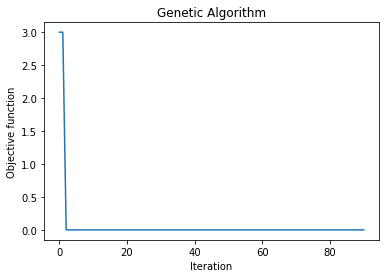

In [2]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def f(X):
    return np.sum(X)

varbound=np.array([[0,10]]*3)

model=ga(function=f,dimension=3,variable_type='int',variable_boundaries=varbound)

model.run()


In a nonogram 2x2 we want to find a set of X=(x1,x2,x3,x4) that minimizes an error function f(X)=x1+x2+x3 where X can be any integer number in [0,1].
The error function compute the deviation from the clues.

## 8.2. Proof of concept on 2x2

In [ ]:
# create the game engine
puzzle2x2 = Puzzle(clues2x2)
game2x2 = SolvedNonoGameEngine(puzzle2x2, solution2x2)

to make it simple we will use the overall sum. The real function should compare col/row sums on X with clues

In [ ]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def f(X):
    # assume we know a solution to avoid ilplementing the sums
    # minimizing the error
    game2x2.submit(X.tolist())
    return game2x2.errors

varbound=np.array([[0,1]]*puzzle2x2.cells_count)

model=ga(function=f, 
         dimension=puzzle2x2.cells_count, 
         variable_type='int',
         variable_boundaries=varbound)

model.run()

In [ ]:
# TODO collect samples

In [113]:
convergence=model.report
convergence

[8.0,
 6.0,
 4.0,
 4.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [ ]:
solution = model.output_dict
solution

Please note that it found any array with three 1 and one 0. This is caused by the error function being too loose.
In the dict
- variable contains the optimized output
- function is the residual error after the model ran

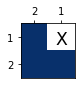

In [9]:
game2x2.submit(solution['variable'].tolist())
game2x2.show()

Test 5x5

In [10]:
# create the game engine
puzzle5x5s = Puzzle(clues5x5s)
game5x5s = SolvedNonoGameEngine(puzzle5x5s, solution5x5s)

 The best solution found:                                                                           
 [0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1.]

 Objective function:
 0.0


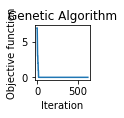

In [11]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def f(X):
    # assume we know a solution to avoid ilplementing the sums
    # minimizing the error
    game5x5s.submit(X.tolist(), apply=False)
    return game5x5s.errors

varbound=np.array([[0,1]]*puzzle5x5s.cells_count)

model=ga(function=f, 
         dimension=puzzle5x5s.cells_count, 
         variable_type='int',
         variable_boundaries=varbound)

model.run()

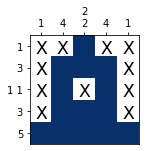

In [13]:
solution = model.output_dict
game5x5s.submit(solution['variable'].tolist())
game5x5s.show()

## 8.3. Wrap up

What works:
- it is simple to design and implement
- pretty easy to use
- it works on a numpy which will make it easy to compute rules

Limitation:
- May be overkill for this simple problem


This prrof of concept is 

Computations in the error function may use reshape and np.sum to cimpute sums on X. And then compare each sums to each clue in order to compute the abs error sum element by element. 

In [ ]:
states = np.array([1, 0, 1, 1]).reshape(2,2)
states

In [ ]:
states.sum(axis=0) # O col

In [ ]:
states.sum(axis=1) # 1 col

- Ideation: 10mn
- Design: 10mn - feature out that X is a numpty arry
- Implementation: 20mn  - error function (but only sum up, not real rules, estimated to 1h)